# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
      x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
      y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape , output_neuron = 10 , neurons = [256 , 256 , 256 , 128]):
    """
    Build your own model
    """
    inputs = keras.layers.Input(shape = input_shape)
    for i , neuron in enumerate(neurons):
      if i ==0:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(inputs)
      else:
        x = keras.layers.Dense(units = neuron , activation = 'relu')(x)
    outputs = keras.layers.Dense(units = output_neuron , activation = 'softmax')(x)
    model = keras.models.Model(inputs = [inputs] , outputs = [outputs])
    return model

In [9]:
## 超參數設定
"""
Set your required experiment parameters
"""
epochs = 20
batch_size = 128
lr = 1e-3
opt = ['sgd' , 'rmsprop' , 'adagrad' , 'adam']

In [10]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt in opt:
  keras.backend.clear_session()
  print('opt:' , opt)
  model = build_mlp(x_train.shape[1:])
  model.compile(loss = 'categorical_crossentropy' , optimizer = opt , metrics = ['acc'])
  model.fit(x_train , y_train , epochs = epochs , batch_size = batch_size , validation_data = (x_test , y_test) , shuffle = True)

  # Collect results
  train_loss = model.history.history["loss"]
  valid_loss = model.history.history["val_loss"]
  train_acc = model.history.history["acc"]
  valid_acc = model.history.history["val_acc"]
    
  results[opt] = {'train-loss': train_loss,
                  'valid-loss': valid_loss,
                  'train-acc': train_acc,
                  'valid-acc': valid_acc}

opt: sgd
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 3s 65us/step - loss: 2.0385 - acc: 0.2701 - val_loss: 1.9132 - val_acc: 0.2975
Epoch 2/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.8437 - acc: 0.3383 - val_loss: 1.7950 - val_acc: 0.3655
Epoch 3/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7667 - acc: 0.3711 - val_loss: 1.7499 - val_acc: 0.3799
Epoch 4/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.7132 - acc: 0.3930 - val_loss: 1.6625 - val_acc: 0.4068
Epoch 5/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6690 - acc: 0.4087 - val_loss: 1.7251 - val_acc: 0.3902
Epoch 6/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6351 - acc: 0.4207 - val_loss: 1.6103 - val_acc: 0.4332
Epoch 7/20
50000/50000 [==============================] - 2s 33us/step - loss: 1.6006 - acc: 0.4337 - val_loss: 1.6174 

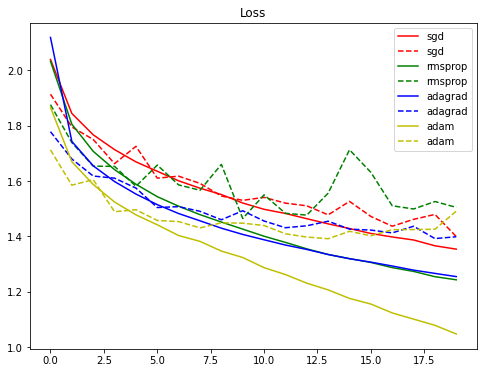

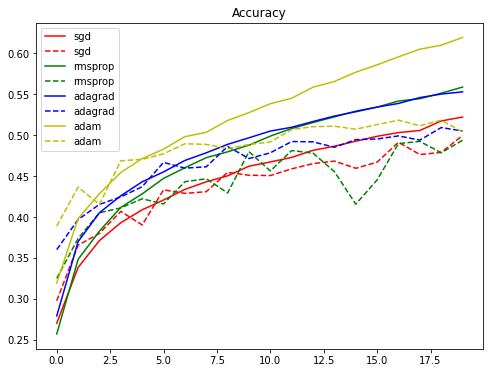

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]
"""
將實驗結果繪出
"""
plt.figure(figsize = (8 , 6))
for i , opt in enumerate(results.keys()):
  plt.plot(range(len(results[opt]['train-loss'])) , results[opt]['train-loss'], '-', label = opt, color=color_bar[i])
  plt.plot(range(len(results[opt]['valid-loss'])) , results[opt]['valid-loss'], '--', label = opt, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (8 , 6))
for i , opt in enumerate(results.keys()):
  plt.plot(range(len(results[opt]['train-acc'])) , results[opt]['train-acc'], '-', label = opt, color=color_bar[i])
  plt.plot(range(len(results[opt]['valid-acc'])) , results[opt]['valid-acc'], '--', label = opt, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()